# CS5920 - Assignment 2

Marking Id:1240

Report is built as per step 12: 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
import pandas as pd
import math as m
from sklearn.neighbors import KNeighborsClassifier

(a). Lasso predictions for diabetes data from Scikit-learn:

In [2]:
dia = load_diabetes()
X_train,X_test,y_train,y_test = train_test_split(dia['data'],dia['target'],random_state =517)
lasso = Lasso().fit(X_train,y_train)
residual_square_train = lasso.score(X_train,y_train)
residual_square_test = lasso.score(X_test,y_test)

In [3]:
print("(a). Lasso Predictions for Diabetes data from Scikit-learn:")
print("Training R^2:",residual_square_train)
print("Test R^2:",residual_square_test)
print("No of features used:",np.sum(lasso.coef_ != 0))
print("Features used:\n1.bmi\n2.bp\n3.s5")

(a). Lasso Predictions for Diabetes data from Scikit-learn:
Training R^2: 0.37862074632457665
Test R^2: 0.30047992965748094
No of features used: 3
Features used:
1.bmi
2.bp
3.s5


(b). Lasso predictions for the Original data loaded from diabetes.data:

In [4]:
dia_data = np.genfromtxt('diabetes.data',delimiter = "\t",skip_header = 1,usecols=np.arange(10))
dia_target = np.genfromtxt('diabetes.data',delimiter = "\t",skip_header = 1,usecols=10)

In [5]:
X_t,X_te,y_t,y_te = train_test_split(dia_data,dia_target,random_state =517)
lasso_o = Lasso().fit(X_t,y_t)
residual_square_train2 = lasso_o.score(X_t,y_t)
residual_square_test2 = lasso_o.score(X_te,y_te)
print("(b).Lasso predictions for the Original data loaded from diabetes.data:")
print("Training R^2:",residual_square_train2)
print("Test R^2:",residual_square_test2)
print("No of features used:",np.sum(lasso_o.coef_ != 0))

(b).Lasso predictions for the Original data loaded from diabetes.data:
Training R^2: 0.5163238199482338
Test R^2: 0.46042783895046974
No of features used: 9


(c). Lasso predictions after normalizing the original data from diabetes.data:

In [6]:
scaler = StandardScaler()
scaler.fit(X_t)
X_t_scaled = scaler.transform(X_t)
X_te_scaled = scaler.transform(X_te)
lasso_s = Lasso().fit(X_t_scaled,y_t)
residual_square_train3 = lasso_s.score(X_t_scaled,y_t)
residual_square_test3 = lasso_s.score(X_te_scaled,y_te)
print("(c).Lasso predictions after normalizing the original data from diabetes.data:")
print("Training R^2:",residual_square_train2)
print("Test R^2:",residual_square_test2)
print("No of features used:",np.sum(lasso_s.coef_ != 0))
print("The values are more closer to item 6(i.e. the values predicted for original data.)")

(c).Lasso predictions after normalizing the original data from diabetes.data:
Training R^2: 0.5163238199482338
Test R^2: 0.46042783895046974
No of features used: 8
The values are more closer to item 6(i.e. the values predicted for original data.)


Plot between the No of features used and the Test R^2 for differing alpha:

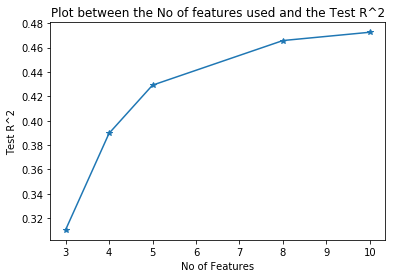

In [7]:
test = list()
t_coef = list()
alpha=[0.1,1,5,10.5,20]
plt.title("Plot between the No of features used and the Test R^2")
plt.xlabel("No of Features")
plt.ylabel("Test R^2")
for i in range(len(alpha)):
    lasso_9 = Lasso(alpha = alpha[i]).fit(X_t_scaled,y_t)
    residual_square_train3 = lasso_9.score(X_t_scaled,y_t)
    test.append(lasso_9.score(X_te_scaled,y_te))
    t_coef.append(np.sum(lasso_9.coef_ != 0))

plt.plot(t_coef,test,marker="*")


No of features used is 3 and the Test R^2 value is approx to 0.32 - R^2 value is closer to the values predicted for the dataset from scikit-learn.
No of Features used is 10 and the Test R^2 value is approx to 0.48 - R^2 is increases resulting to increase in possibility of overfitting.
I prefer the points where no of features is 5 or 8, since the Test R^2 is optimal, avoiding overfitting/underfitting.

(d). Finding the best alpha using cross-validation:

In [8]:
best_score=0
b_alpha=list()
best_alpha=0
for i in range(len(alpha)):
    lasso_10 = Lasso(alpha = alpha[i])
    scores=cross_val_score(lasso_10,X_t_scaled,y_t,cv=5)
    score = np.mean(scores)
    if best_score==0:
        best_score=score
    if score >= best_score:
        b_alpha.append(alpha[i])
        best_score = score
        best_alpha = alpha[i]
        
lasso_b = Lasso(alpha = best_alpha).fit(X_t_scaled,y_t)
best_train=lasso_b.score(X_t_scaled,y_t)
best_test=lasso_b.score(X_te_scaled,y_te)
best_t_coef=np.sum(lasso_b.coef_ != 0)

print("(d). Best Alpha and resulting Training & Test R^2 and number of features used.\n")
print("Best Alpha:",best_alpha)
print("Training R^2:",best_train)
print("Test R^2:",best_test)
print("No of Features:",best_t_coef)

(d). Best Alpha and resulting Training & Test R^2 and number of features used.

Best Alpha: 1
Training R^2: 0.5182976710746371
Test R^2: 0.4657450926533787
No of Features: 8


(e). Inductive Conformal Prediction:

In [9]:
class Lasso_ICP:
    def __init__(self,m,sl,x_train,y_train,x_test,y_test):
        self.k=int((1-sl)*(m+1))
        self.random_state = 517
        self.calib_size = 99
        self.alpha = 0
        self.y_train_p=list()
        self.y_valid=list()
        self.C =0
        self.X_te = x_test
        self.y_test = y_test
        self.X_t = x_train
        self.y_t = y_train
        self.alpha_set = [0.1,1,5,10.5,20]
        
    def main(self):
        X_train_p,x_vaild,self.y_train_p,self.y_valid=train_test_split(self.X_t,self.y_t,random_state=self.random_state,test_size=self.calib_size)
#        print(X_train_p.shape,x_vaild.shape,y_train_p.shape,y_valid.shape)
        scaler.fit(X_train_p)
        self.X_t_p_scaled=scaler.transform(X_train_p)
        self.X_te_scaled = scaler.transform(self.X_te)
        self.X_valid_scaled = scaler.transform(x_vaild)
        best_score=0
        best_alpha=0
        for i in range(len(self.alpha_set)):
            lasso_cv = Lasso(alpha = self.alpha_set[i])
            scores=cross_val_score(lasso_cv,self.X_t_p_scaled,self.y_train_p,cv=5)
            score = np.mean(scores)
            if best_score==0:
                best_score=score
            if score > best_score:
                best_score = score
                best_alpha = self.alpha_set[i]
        self.alpha=best_alpha
        accuracy=self.Lasso_ICP()
        return accuracy
    def length_interval(self,y_interval):
        y_length = list()
        for y in y_interval:
            y_length.append(round(y_interval[i][1]-y_interval[i][0],2))
        return np.mean(y_length)
    def Lasso_ICP (self):
        lasso_c = Lasso(self.alpha).fit(self.X_t_p_scaled,self.y_train_p)
        y_calib_pred =lasso_c.predict(self.X_valid_scaled)
        scores = self.nonconf_scores(y_calib_pred)
        sort_scores = sorted(scores)
        self.C = sort_scores[self.k]
        y_test_pred = lasso_c.predict(self.X_te_scaled)
        y_interval = self.ICP_measure(y_test_pred)
        accuracy = self.score(y_interval)
        y_length = len(y_interval)
        return accuracy,y_length
    
    def score(self,y_interval):
        val =0
        for i in range(len(y_interval)):
            if self.y_test[i]>=y_interval[i][0] and self.y_test[i]<=y_interval[i][1]:
                val+=1
        mean_val = val/len(y_interval)
        return mean_val
    
    def ICP_measure(self,y_predict):
        y_interval=list()
        for y in y_predict:
            y_interval.append([y-self.C,y+self.C])
        return y_interval
    def nonconf_scores(self,y_predict):
        scores=list()
        for i in range(len(y_predict)):
            scores.append(abs(self.y_valid[i]-y_predict[i]))
        return scores
       
icp = Lasso_ICP(99,0.2,X_t,y_t,X_te,y_te) 
acc,y_length = icp.main()
print("(e). Inductive Conformal Prediction with significance level - 20%:")
print("Length of the Prediction Intervals:",y_length)
print("Test Error Rate:",round(1-acc,2))
icp = Lasso_ICP(99,0.05,X_t,y_t,X_te,y_te) 
acc,y_length = icp.main()
print("Inductive Conformal Prediction with significance level - 5%:")
print("Length of the Prediction Intervals:",y_length)
print("Test Error Rate:",round(1-acc,2)) 

(e). Inductive Conformal Prediction with significance level - 20%:
Length of the Prediction Intervals: 111
Test Error Rate: 0.23
Inductive Conformal Prediction with significance level - 5%:
Length of the Prediction Intervals: 111
Test Error Rate: 0.08
